In [1]:
#from shapely.geometry import Point
import seaborn as sns
import numpy as np
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
#from collections import Counter
#from folium.plugins import MarkerCluster
#from folium.plugins import FastMarkerCluster

world = gpd.read_file('custom.geo.json')
print(world.crs)
world.head( )

In [2]:
warheads=pd.read_csv('nuclear_warheads.csv')
warheads

,Year,United States,Russia,United Kingdom,France,China,Israel,India,Pakistan,North Korea,Unnamed: 10
0,1945,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1946,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1947,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1948,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1949,170,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
71,2016,"4,018","4,490",215.0,300.0,260.0,80.0,120.0,130.0,4.0,NaN
72,2017,"4,000","4,300",215.0,300.0,270.0,80.0,130.0,140.0,5.0,NaN
73,2018,"4,000","4,350",215.0,300.0,280.0,80.0,135.0,145.0,10.0,NaN
74,2019,"3,800","4,490",215.0,300.0,290.0,85.0,140.0,150.0,15.0,NaN


In [3]:
tests=pd.read_csv('nuclear_weapon_explosions_1945-1998.csv')
a=tests[datetime]

,Unnamed: 0,latitude,longitude,depth,mb,name,source,Country,datetime,max_yield,medium,confirmation,salvo
0,1,41.5000,88.5000,0.0,NaN,-,BOLT,China,10/16/1964 7:00:00 AM,20.0,Air,presumed,0
1,2,41.5000,88.5000,0.0,NaN,-,BOLT,China,5/14/1965 2:00:00 AM,20.0,Air,presumed,0
2,3,41.5000,88.5000,0.0,NaN,-,BOLT,China,5/9/1966 8:00:00 AM,200.0,Air,presumed,0
3,4,41.5000,88.5000,0.0,NaN,-,NRDC,China,10/27/1966 1:10:00 AM,0.0,Air,unknown,0
4,5,41.5000,88.5000,0.0,NaN,-,NRDC,China,12/28/1966 4:00:00 AM,0.0,Air,unknown,0
5,6,40.7440,89.7750,NaN,4.70,-,GUPTA-JED,China,6/17/1967 12:19:08 AM,3300.0,Air,presumed,0
6,7,41.5000,88.5000,0.0,NaN,-,NRDC,China,12/24/1967 4:00:00 AM,0.0,Air,unknown,0
7,8,41.5000,88.5000,0.0,NaN,-,BOLT,China,12/27/1968 7:30:00 AM,0.0,Air,unknown,0
8,9,41.3760,88.3180,NaN,5.20,-,GUPTA-JED,China,9/22/1969 4:14:59 PM,19.2,Underground,presumed,0
9,10,40.7220,89.5150,NaN,4.37,-,GUPTA-JED,China,9/29/1969 8:40:12 AM,3000.0,Air,presumed,0


In [4]:
oops=pd.read_csv('NuclearPowerAccidents2016.csv')
oops_ord=oops.sort_values(by=['Fatalities'], ascending=False)
oops_ord

,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
0,4/26/1986,"Kiev, Ukraine",259336.0,7.0,8.0,EE,Mishandled reactor safety test at Chernobyl nu...,4056
1,3/11/2011,"Fukushima Prefecture, Japan",166089.0,7.0,7.5,A,An earthquake and tsunami caused emergency bac...,573
12,9/29/1957,"Kyshtym, Chelyabinsk, Soviet Union",1733.4,6.0,7.3,EE,Heat exchangers failed at nitrate storage tank...,103
56,10/8/1957,"Windscale, United Kingdom",89.9,5.0,4.6,WE,"Fire ignited plutonium piles, created radioact...",33
124,8/9/2004,"Fukui Prefecture, Japan",10.7,1.0,NaN,A,Steam explosion at Mihama Nuclear Power Plant ...,5
...,...,...,...,...,...,...,...,...
77,8/23/2011,"Mineral, Virginia, United States",48.2,NaN,NaN,NaN,A magnitude 5.8 earthquake damaged Dominion En...,0
78,6/16/2005,"Braidwood, Illinois, United States",47.1,NaN,NaN,NaN,Exelon’s Braidwood nuclear station leaked trit...,0
79,11/1/1983,"Sellafield, UK",44.0,3.0,NaN,WE,Inadvertent transfer of 59 TBq activity with s...,0
80,9/5/1996,"Clinton, Illinois, United States",43.9,NaN,NaN,NaN,Reactor recirculation pump failed and required...,0


In [5]:
oops['Date']=pd.to_datetime(oops['Date'])
oops_g=oops.groupby([date.year for date in oops['Date']]).count()
oops_g=oops_g.reset_index()

oops_g

,index,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
0,1946,1,1,1,0,0,0,1,1
1,1949,1,1,1,1,1,0,1,1
2,1952,1,1,1,0,0,0,1,1
3,1955,4,4,4,4,3,3,4,4
4,1957,3,3,3,3,3,2,3,3
5,1958,4,4,4,2,0,2,4,4
6,1959,1,1,1,1,0,0,1,1
7,1960,1,1,1,1,0,0,1,1
8,1961,2,2,2,2,2,0,2,2
9,1964,1,1,1,1,0,0,1,1


[Text(0, 0, '1946'),
 Text(1, 0, '1949'),
 Text(2, 0, '1952'),
 Text(3, 0, '1955'),
 Text(4, 0, '1957'),
 Text(5, 0, '1958'),
 Text(6, 0, '1959'),
 Text(7, 0, '1960'),
 Text(8, 0, '1961'),
 Text(9, 0, '1964'),
 Text(10, 0, '1965'),
 Text(11, 0, '1966'),
 Text(12, 0, '1967'),
 Text(13, 0, '1968'),
 Text(14, 0, '1969'),
 Text(15, 0, '1970'),
 Text(16, 0, '1971'),
 Text(17, 0, '1972'),
 Text(18, 0, '1973'),
 Text(19, 0, '1974'),
 Text(20, 0, '1975'),
 Text(21, 0, '1976'),
 Text(22, 0, '1977'),
 Text(23, 0, '1978'),
 Text(24, 0, '1979'),
 Text(25, 0, '1980'),
 Text(26, 0, '1981'),
 Text(27, 0, '1982'),
 Text(28, 0, '1983'),
 Text(29, 0, '1984'),
 Text(30, 0, '1985'),
 Text(31, 0, '1986'),
 Text(32, 0, '1987'),
 Text(33, 0, '1988'),
 Text(34, 0, '1989'),
 Text(35, 0, '1990'),
 Text(36, 0, '1991'),
 Text(37, 0, '1992'),
 Text(38, 0, '1993'),
 Text(39, 0, '1995'),
 Text(40, 0, '1996'),
 Text(41, 0, '1997'),
 Text(42, 0, '1999'),
 Text(43, 0, '2001'),
 Text(44, 0, '2002'),
 Text(45, 0, '2003')

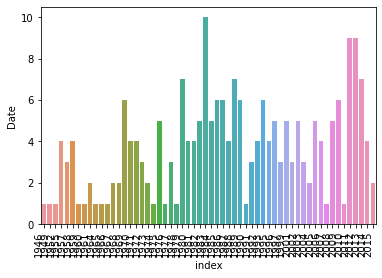

In [6]:
#seaborn.barplot(x=oops_g.date.value_counts().index, y=oops.date.value_counts())
g=sns.barplot(data=oops_g, x="index", y="Date", linewidth=1.5)
mpl.rcParams['figure.figsize'] = 15,10
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

In [7]:
#oops['Date']=oops.to_datetime(oops['Date'])
oops['Date']=pd.DatetimeIndex(oops['Date']).year
#oops['year'] = oops['Date'].to_period('Y')
oops_n=oops[['Date', 'Fatalities']]
oops_x=oops_n.groupby(['Date']).sum()
oops_x=oops_x.reset_index()

#oops_x["yr_x_sum"] = oops.groupby([date.year for date in oops['Date']])["Fatalities"].transform(sum)

oops_x.head(10)
#oops

,Date,Fatalities
0,1946,1
1,1949,0
2,1952,0
3,1955,0
4,1957,136
5,1958,5
6,1959,0
7,1960,0
8,1961,3
9,1964,1


[Text(0, 0, '1946'),
 Text(1, 0, '1949'),
 Text(2, 0, '1952'),
 Text(3, 0, '1955'),
 Text(4, 0, '1957'),
 Text(5, 0, '1958'),
 Text(6, 0, '1959'),
 Text(7, 0, '1960'),
 Text(8, 0, '1961'),
 Text(9, 0, '1964'),
 Text(10, 0, '1965'),
 Text(11, 0, '1966'),
 Text(12, 0, '1967'),
 Text(13, 0, '1968'),
 Text(14, 0, '1969'),
 Text(15, 0, '1970'),
 Text(16, 0, '1971'),
 Text(17, 0, '1972'),
 Text(18, 0, '1973'),
 Text(19, 0, '1974'),
 Text(20, 0, '1975'),
 Text(21, 0, '1976'),
 Text(22, 0, '1977'),
 Text(23, 0, '1978'),
 Text(24, 0, '1979'),
 Text(25, 0, '1980'),
 Text(26, 0, '1981'),
 Text(27, 0, '1982'),
 Text(28, 0, '1983'),
 Text(29, 0, '1984'),
 Text(30, 0, '1985'),
 Text(31, 0, '1986'),
 Text(32, 0, '1987'),
 Text(33, 0, '1988'),
 Text(34, 0, '1989'),
 Text(35, 0, '1990'),
 Text(36, 0, '1991'),
 Text(37, 0, '1992'),
 Text(38, 0, '1993'),
 Text(39, 0, '1995'),
 Text(40, 0, '1996'),
 Text(41, 0, '1997'),
 Text(42, 0, '1999'),
 Text(43, 0, '2001'),
 Text(44, 0, '2002'),
 Text(45, 0, '2003')

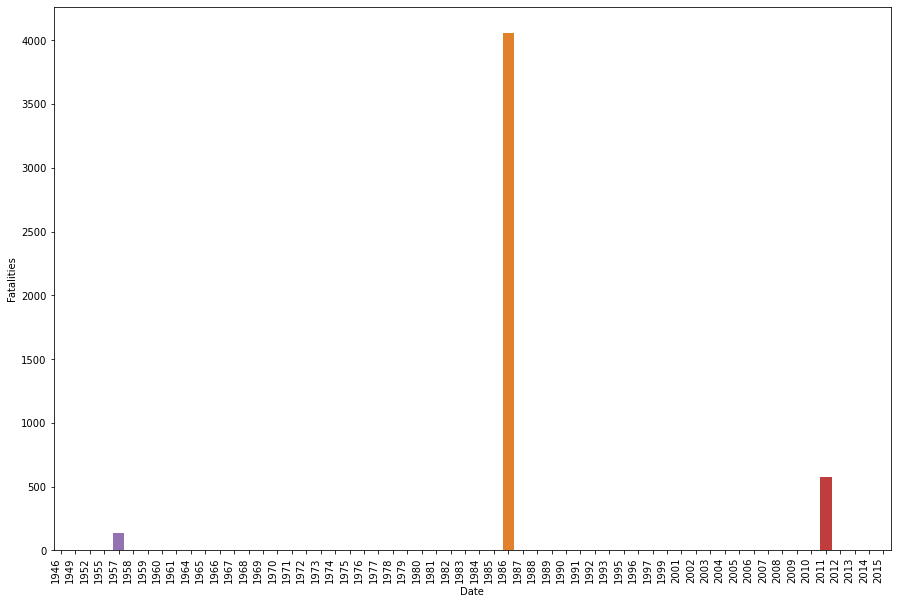

In [8]:
g=sns.barplot(data=oops_x, x="Date", y="Fatalities", palette='tab10', linewidth=1.5)
mpl.rcParams['figure.figsize'] = 15,10
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

In [9]:
#oops['Date']=oops.to_datetime(oops['Date'])
tests['Date']=pd.DatetimeIndex(tests['Date']).year
#oops['year'] = oops['Date'].to_period('Y')
oops_n=oops[['Date', 'Fatalities']]
oops_x=oops_n.groupby(['Date']).sum()
oops_x=oops_x.reset_index()

#oops_x["yr_x_sum"] = oops.groupby([date.year for date in oops['Date']])["Fatalities"].transform(sum)

oops_x.head(10)

KeyError: 'Date'

In [ ]:
cycle_stats=pd.read_csv('cycle_status.csv')
cycle_stats

In [ ]:
emotions=pd.read_csv('emotions.csv')
emotions

In [ ]:
field=pd.read_csv('FieldMeasurements_5.csv')
field['geometry'] = field.apply(lambda x: Point((float(x.Longitude), 
                                                         float(x.Latitude))), 
                                        axis=1)
field_geo = gpd.GeoDataFrame(field, 
                           crs = world.crs, 
                           geometry = field['geometry'])

In [ ]:
field_geo.geometry.centroid
f_center = field_geo.geometry.centroid[42]
f_area_center = [f_center.y, f_center.x]
#GeoSeries.to_crs()
field_map = folium.Map(location =  f_area_center, zoom_start = 12)
field_map

In [ ]:
i = 0
for row_index, row_values in field_geo.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

In [ ]:
#draw our zip code area: 37207
#readings_map = folium.Map(location =  f_area_center, zoom_start = 12)

#folium.GeoJson(field_geo).add_to(readings_map)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

#for row_index, row_values in field_geo.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Type'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(readings_map)
#world_plants.save('../maps/map37207.html')

#display our map